In [1]:
import nibabel as nib

In [59]:
import nilearn as nl

In [64]:
import nilearn.plotting as nlplt
# !pip install git+https://github.com/miykael/gif_your_nifti # nifti to gif 
# import gif_your_nifti.core as gif2nif

In [30]:
# img = nib.load('/Users/chandana/Downloads/Case1-T1.nii')
img = nib.load('/Users/chandana/AI_NEURO/dataset/MASKS/RESECT_segmentation/Case1/Case1-US-after-resection.nii.gz')

In [31]:
data = img.get_data()

<ipython-input-31-1cba63178ba0>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = img.get_data()


In [32]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [40]:
test_load = nib.load('/Users/chandana/AI_NEURO/dataset/MRI_US_Brain/RESECT/NIFTI/Case1/US/Case1-US-after.nii').get_fdata()
test_load.shape

(316, 315, 301)

In [46]:
mask = nib.load('/Users/chandana/AI_NEURO/dataset/MASKS/RESECT_segmentation/Case1/Case1-US-after-resection.nii.gz').get_fdata()
mask.shape

(316, 315, 301)

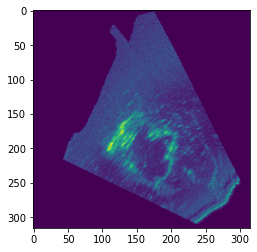

In [41]:
test = test_load[:,:,181]
plt.imshow(test)
plt.show()

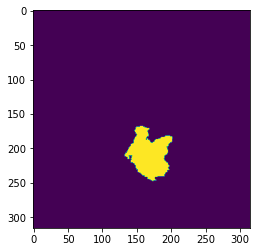

In [47]:
test = mask[:,:,181]
plt.imshow(test)
plt.show()

In [25]:
def load_nii(img_path):
    '''
    Shortcut to load a nifti file
    '''

    nimg = nib.load(img_path)
    return nimg.get_data(), nimg.affine, nimg.header 

In [26]:
load_nii('/Users/chandana/Downloads/049.nii')

<ipython-input-25-b9718ea97a99>:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  return nimg.get_data(), nimg.affine, nimg.header


(memmap([[[-995, -993, -996, ..., -994, -992, -990],
          [-995, -995, -996, ..., -995, -993, -993],
          [-995, -996, -996, ..., -995, -996, -994],
          ...,
          [-996, -996, -995, ..., -992, -993, -992],
          [-995, -996, -993, ..., -991, -992, -992],
          [-996, -996, -994, ..., -991, -991, -992]],
 
         [[-996, -994, -996, ..., -995, -993, -991],
          [-996, -995, -996, ..., -995, -995, -993],
          [-996, -996, -996, ..., -995, -997, -994],
          ...,
          [-996, -996, -993, ..., -992, -994, -992],
          [-996, -996, -992, ..., -991, -992, -993],
          [-996, -996, -994, ..., -990, -990, -992]],
 
         [[-996, -996, -997, ..., -995, -994, -992],
          [-996, -996, -996, ..., -995, -996, -993],
          [-996, -996, -996, ..., -996, -996, -994],
          ...,
          [-996, -996, -993, ..., -992, -994, -993],
          [-996, -996, -993, ..., -990, -994, -994],
          [-996, -996, -995, ..., -990, -992, -9

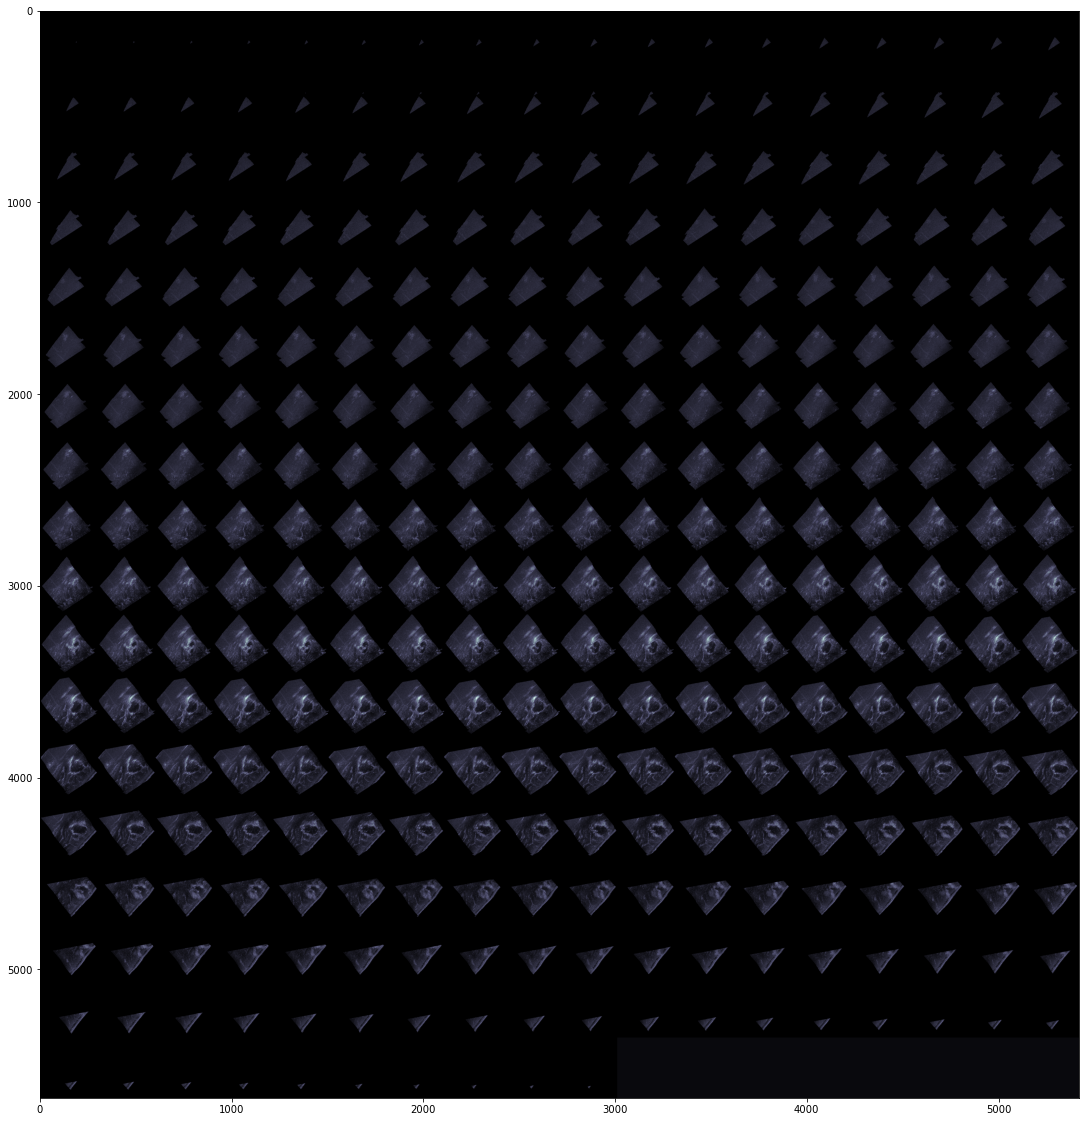

In [48]:
from skimage.util import montage as montage2d
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage2d(test_load), cmap ='bone')

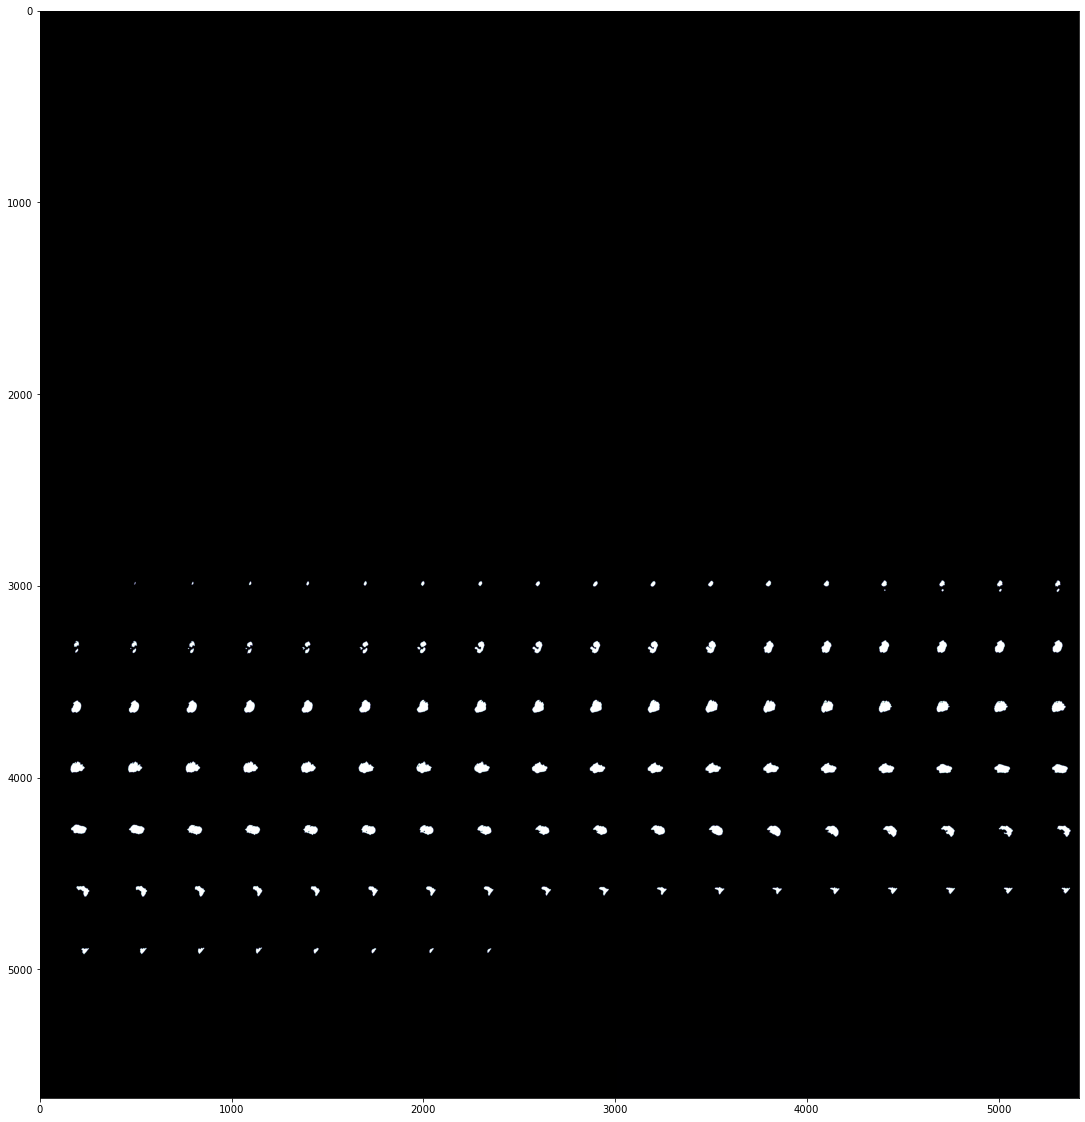

In [49]:
from skimage.util import montage as montage2d
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage2d(mask), cmap ='bone')

In [54]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

In [55]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

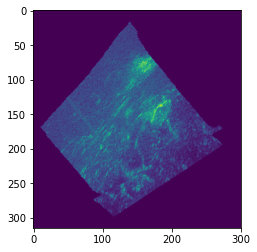

In [56]:
multi_slice_viewer(test_load)

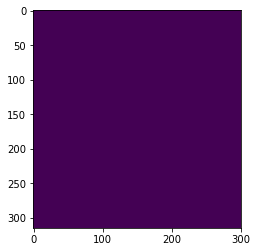

In [57]:
multi_slice_viewer(mask)

In [60]:
niimg = nl.image.load_img('/Users/chandana/AI_NEURO/dataset/MRI_US_Brain/RESECT/NIFTI/Case1/US/Case1-US-after.nii')
nimask = nl.image.load_img('/Users/chandana/AI_NEURO/dataset/MASKS/RESECT_segmentation/Case1/Case1-US-after-resection.nii.gz')

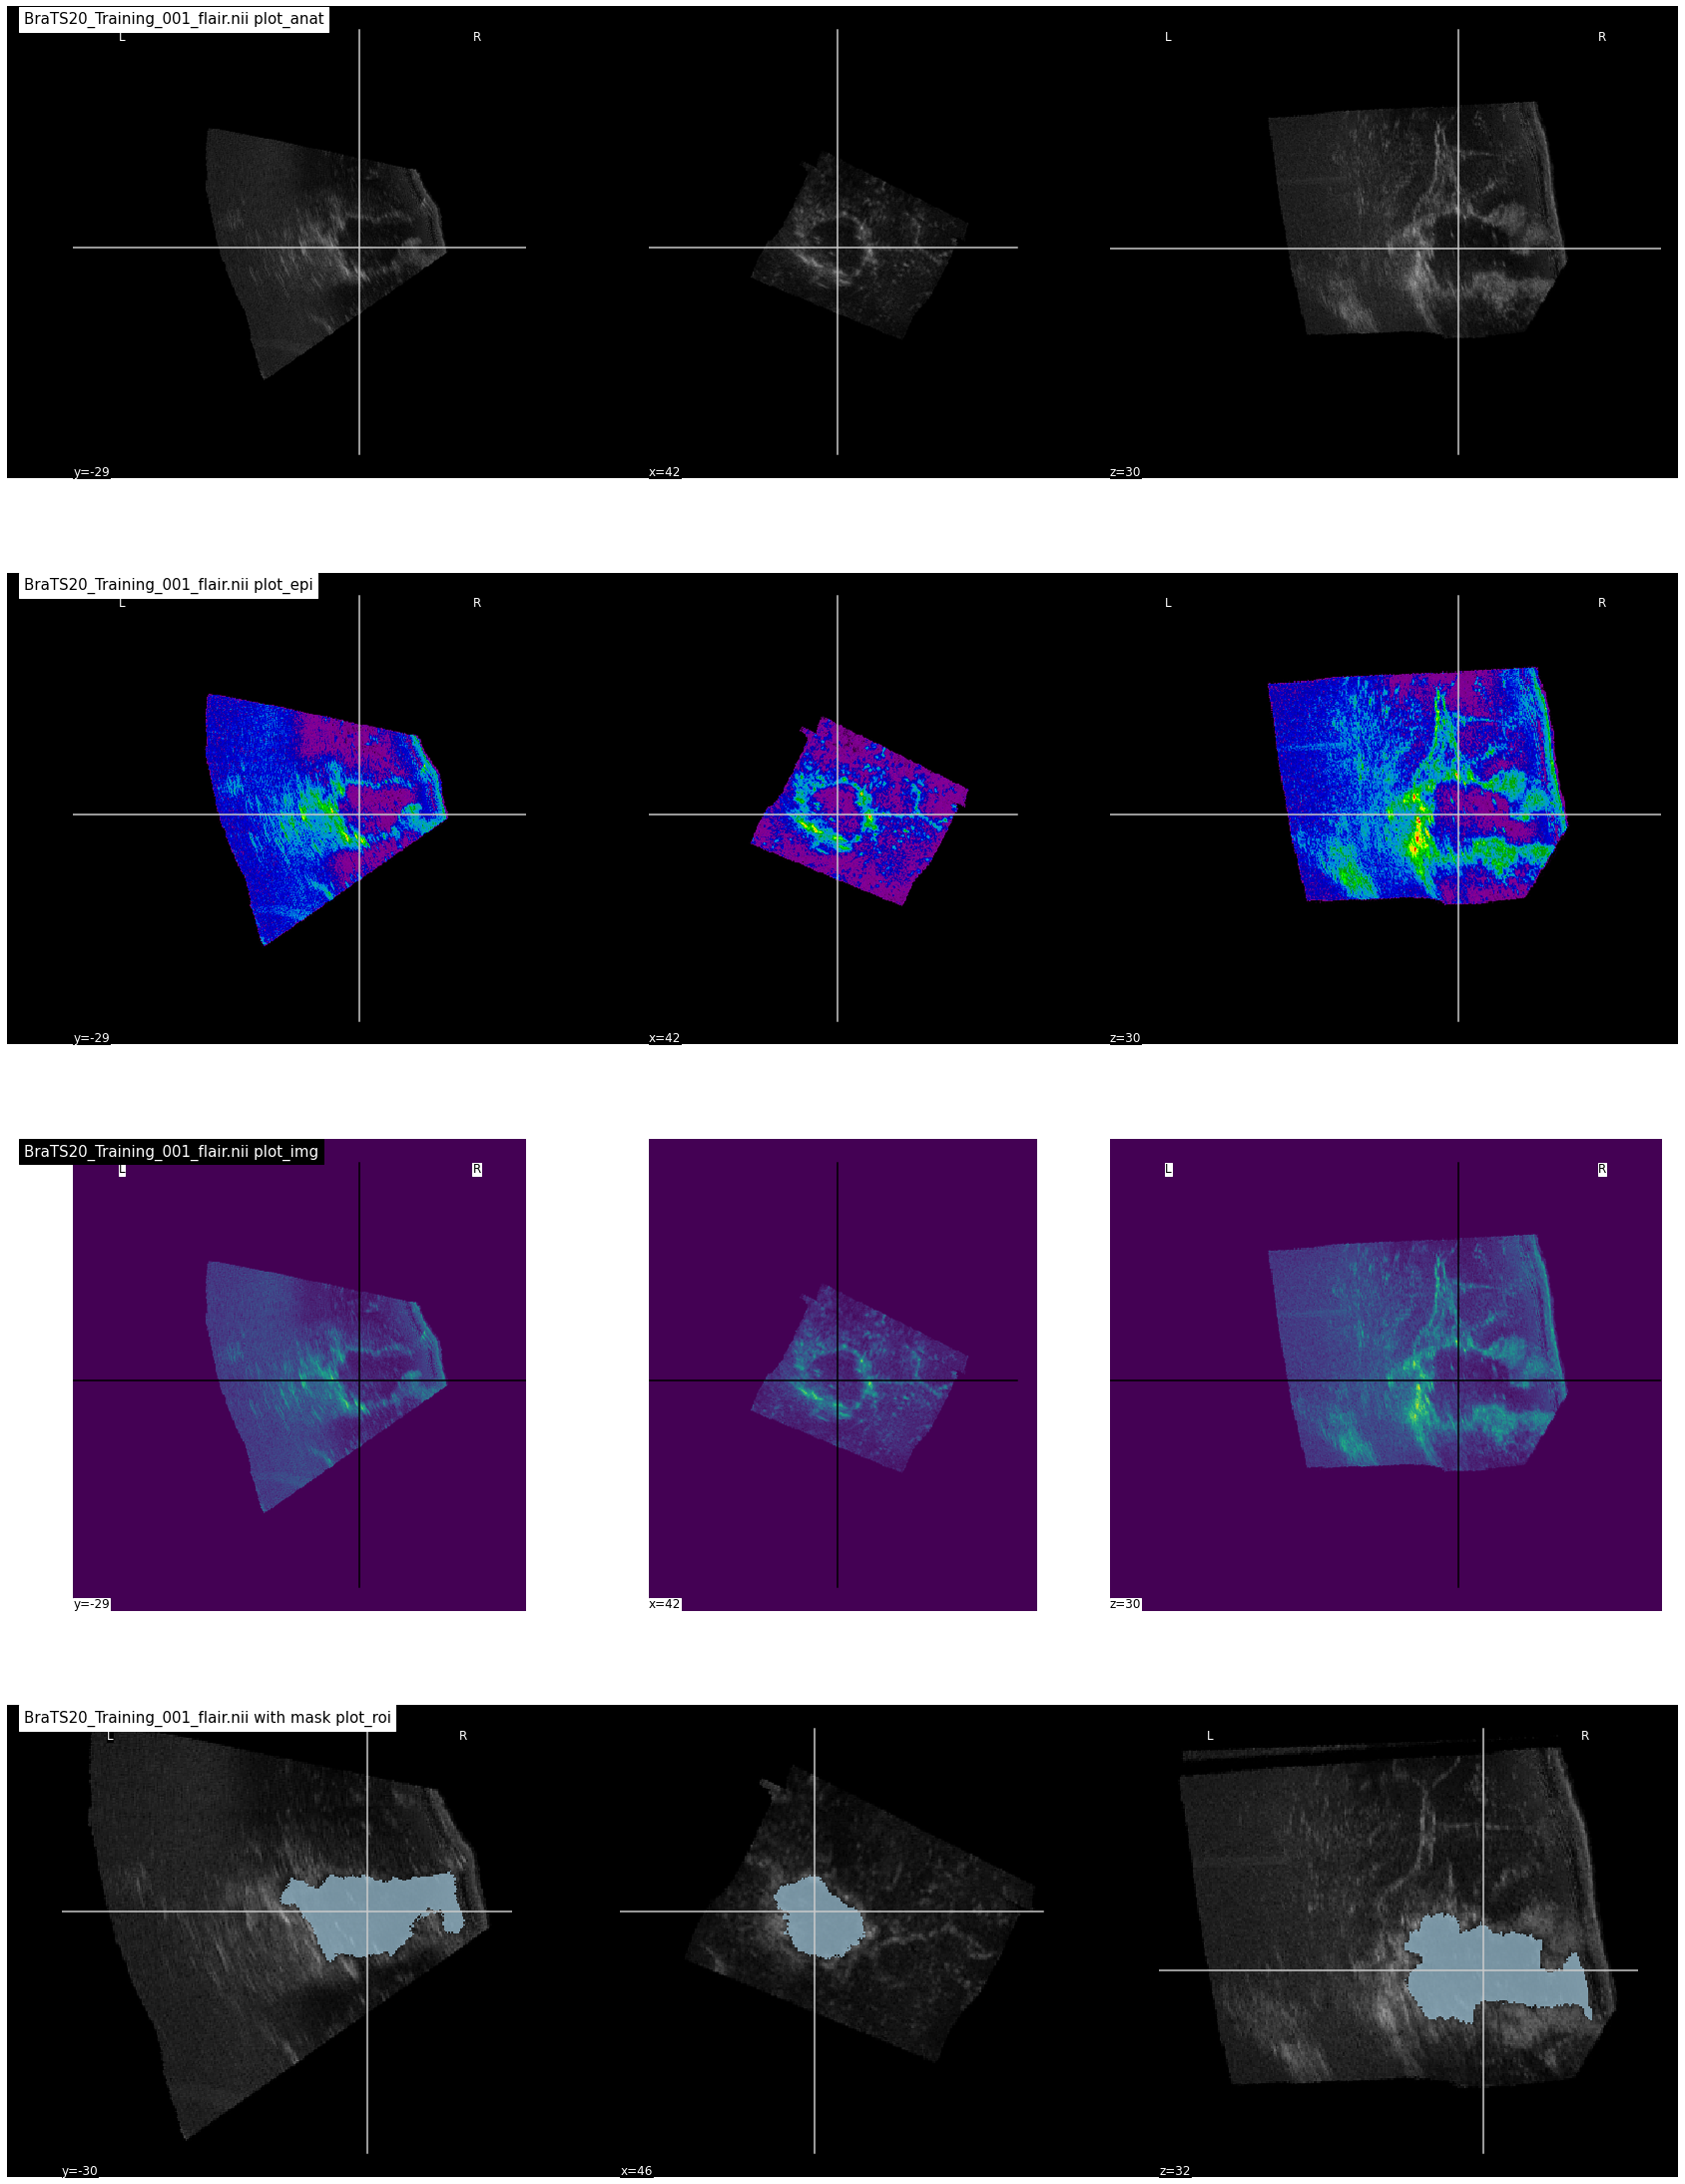

In [61]:
fig, axes = plt.subplots(nrows=4, figsize=(30, 40))


nlplt.plot_anat(niimg,
                title='BraTS20_Training_001_flair.nii plot_anat',
                axes=axes[0])

nlplt.plot_epi(niimg,
               title='BraTS20_Training_001_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS20_Training_001_flair.nii plot_img',
               axes=axes[2])

nlplt.plot_roi(nimask, 
               title='BraTS20_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg, 
               axes=axes[3], cmap='Paired')

plt.show()